# Python Pandas and SQLite

Source code for Medium's article ["Python Pandas and SQLite"](https://towardsdatascience.com/python-pandas-and-sqlite-a0e2c052456f) written by [Alan Jones](https://towardsdatascience.com/@jones.alan).

In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
weather = pd.read_csv("https://github.com/alanjones2/dataviz/raw/master/londonweather.csv")

In [ ]:
weather

In [ ]:
# Just run once
#conn = sql.connect("./data/weather.db")
#weather.to_sql("weather", conn)

In [2]:
conn = sql.connect("./data/weather.db")
weather = pd.read_sql("SELECT * from weather", conn)

In [3]:
weather

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,0,1957,1,8.7,2.7,39.5,53.0
1,1,1957,2,9.0,2.9,69.8,64.9
2,2,1957,3,13.9,5.7,25.4,96.7
3,3,1957,4,14.2,5.2,5.7,169.6
4,4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...,...
743,743,2018,12,10.7,5.2,60.6,40.3
744,744,2019,1,7.6,2.0,33.2,56.4
745,745,2019,2,12.4,3.3,34.2,120.2
746,746,2019,3,13.1,5.8,49.6,119.0


In [4]:
y2010 = pd.read_sql("SELECT * from weather WHERE Year == 2010", conn)

In [5]:
y2010

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,636,2010,1,4.5,-0.3,51.8,51.3
1,637,2010,2,6.9,1.7,100.4,46.7
2,638,2010,3,11.1,3.7,39.8,106.4
3,639,2010,4,15.8,5.6,23.2,201.7
4,640,2010,5,17.3,7.7,20.6,170.4
5,641,2010,6,23.5,12.1,12.4,220.1
6,642,2010,7,25.0,15.1,18.0,161.8
7,643,2010,8,21.6,13.2,88.6,110.9
8,644,2010,9,19.4,11.2,38.2,128.7
9,645,2010,10,15.2,8.3,74.8,104.0


In [6]:
y1960 = pd.read_sql("SELECT * from weather WHERE Year == 1960", conn)

In [7]:
y1960

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,36,1960,1,6.9,1.8,47.9,34.4
1,37,1960,2,7.9,1.6,48.0,80.1
2,38,1960,3,10.2,4.5,33.9,65.0
3,39,1960,4,14.3,4.6,12.4,156.1
4,40,1960,5,18.4,9.3,45.6,181.7
5,41,1960,6,22.1,12.1,42.8,248.6
6,42,1960,7,20.1,12.4,67.2,139.7
7,43,1960,8,20.3,11.8,60.8,150.9
8,44,1960,9,18.5,10.5,75.3,128.4
9,45,1960,10,14.2,8.2,155.5,75.2


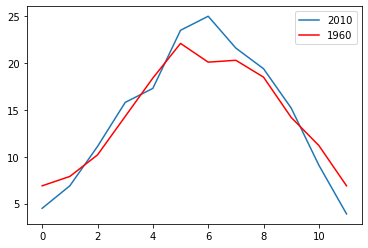

In [8]:
ax2010 = y2010.plot(y="Tmax")
ax = y1960.plot(y="Tmax", color="red", ax=ax2010)
ax.legend(["2010", "1960"])

In [9]:
high = pd.read_sql("SELECT Year, Month, Tmax FROM weather WHERE Tmax > 25", conn)

In [10]:
high

,Year,Month,Tmax
0,1975,8,25.9
1,1976,6,25.5
2,1976,7,26.6
3,1976,8,25.1
4,1983,7,27.6
5,1989,7,25.8
6,1990,8,26.0
7,1994,7,26.2
8,1995,7,26.3
9,1995,8,27.0


In [12]:
high = pd.read_sql("SELECT Year, Month, Tmax \
                    FROM weather \
                    WHERE Tmax > 25 \
                    ORDER by Tmax DESC", conn)

In [13]:
high

,Year,Month,Tmax
0,2018,7,28.3
1,2006,7,28.2
2,1983,7,27.6
3,1995,8,27.0
4,2013,7,27.0
5,1976,7,26.6
6,2003,8,26.4
7,1995,7,26.3
8,1994,7,26.2
9,1990,8,26.0


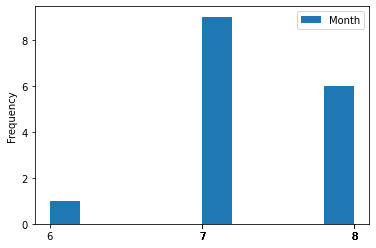

In [14]:
high.plot.hist(y="Month", xticks=high["Month"])

In [15]:
july = pd.read_sql("SELECT Year, Month, Tmax \
                    FROM weather \
                    WHERE MONTH == 6", conn)

In [16]:
july

,Year,Month,Tmax
0,1957,6,23.6
1,1958,6,19.4
2,1959,6,22.1
3,1960,6,22.1
4,1961,6,21.7
...,...,...,...
57,2014,6,22.1
58,2015,6,22.2
59,2016,6,20.7
60,2017,6,24.0


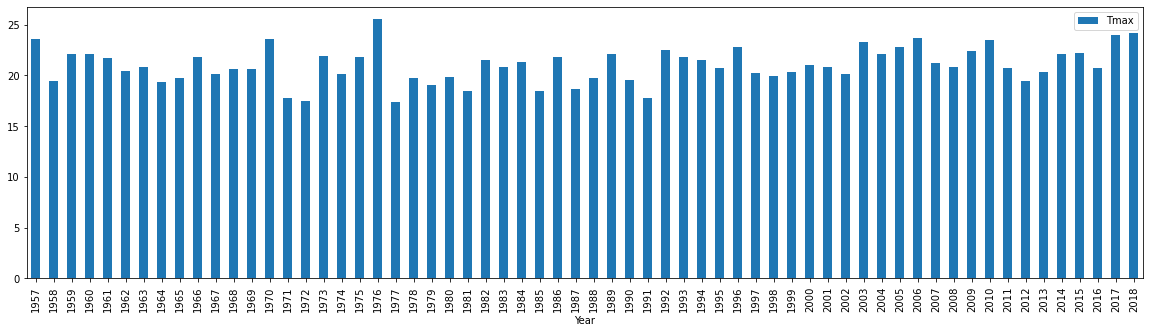

In [17]:
july.plot.bar(x="Year", y="Tmax", figsize=(20, 5))